In [1]:
library(monocle)
library(Matrix)

Loading required package: Matrix
Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:Matrix’:

    colMeans, colSums, rowMeans, rowSums, which

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, 

In [2]:
 mat <- readMM("~/jamboree/10x_pbmc/counts/from_10x/filtered_gene_bc_matrices/GRCh38/matrix.mtx")

In [27]:
tsne_monocle <- function(mat) {
    row.names(mat) <- paste0("gene_", 1:nrow(mat))
    colnames(mat) <- paste0("cell_", 1:ncol(mat))
    dhsinfo <- data.frame(x = 1:nrow(mat))
    row.names(dhsinfo) <- row.names(mat)

    cellinfo <- data.frame(x = 1:ncol(mat))
    row.names(cellinfo) <- colnames(mat)

    fd <- new("AnnotatedDataFrame", data = dhsinfo)
    pd <- new("AnnotatedDataFrame", data = cellinfo)
    GM_cds <-  newCellDataSet(as(mat, "sparseMatrix"),
              phenoData = pd,
              featureData = fd,
              lowerDetectionLimit=1)
      GM_cds <- detectGenes(GM_cds, min_expr = 0.1)
      GM_cds <- estimateSizeFactors(GM_cds)
      GM_cds <- estimateDispersions(GM_cds)
    
    disp_table <- dispersionTable(GM_cds)
    unsup_clustering_genes <- subset(disp_table, mean_expression >= 0.1)
    GM_cds <- setOrderingFilter(GM_cds, unsup_clustering_genes$gene_id)
    
    
    GM_cds <- reduceDimension(GM_cds, max_components = 2, num_dim = 6,
                        reduction_method = 'tSNE', verbose = T)
    GM_cds <- clusterCells(GM_cds, method="densityPeak")
    return(pData(GM_cds)$Cluster)
}

In [28]:
x <- tsne_monocle(mat)

Warning message in newCellDataSet(as(mat, "sparseMatrix"), phenoData = pd, featureData = fd, :
“None of your featureData columns are named 'gene_short_name', some functions will not be able
           to take this function as input as a result”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Removing 102 outliers
Remove noise by PCA ...
Reduce dimension by tSNE ...
Warning message in if (method == "DDRTree") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "densityPeak") {:
“the condition has length > 1 and only the first element will be used”

Distance cutoff calculated to 4.590591 


In [29]:
head(x)

[1] 7  5  2  3  10 11
Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17

In [12]:
dhsinfo <- data.frame(x = 1:nrow(mat))
row.names(dhsinfo) <- row.names(mat)

cellinfo <- data.frame(x = 1:ncol(mat))
row.names(cellinfo) <- colnames(mat)

fd <- new("AnnotatedDataFrame", data = dhsinfo)
  pd <- new("AnnotatedDataFrame", data = cellinfo)
  GM_cds <-  newCellDataSet(as(mat, "sparseMatrix"),
                          phenoData = pd,
                          featureData = fd,
                          lowerDetectionLimit=1)

Warning message in newCellDataSet(as(mat, "sparseMatrix"), phenoData = pd, featureData = fd, :
“None of your featureData columns are named 'gene_short_name', some functions will not be able
           to take this function as input as a result”

In [13]:
GM_cds

CellDataSet (storageMode: environment)
assayData: 33694 features, 8381 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: cell_1 cell_2 ... cell_8381 (8381 total)
  varLabels: x Size_Factor
  varMetadata: labelDescription
featureData
  featureNames: gene_1 gene_2 ... gene_33694 (33694 total)
  fvarLabels: x
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [14]:
  GM_cds <- detectGenes(GM_cds, min_expr = 0.1)
  GM_cds <- estimateSizeFactors(GM_cds)

In [15]:
  GM_cds <- estimateDispersions(GM_cds)

Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Removing 102 outliers


Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

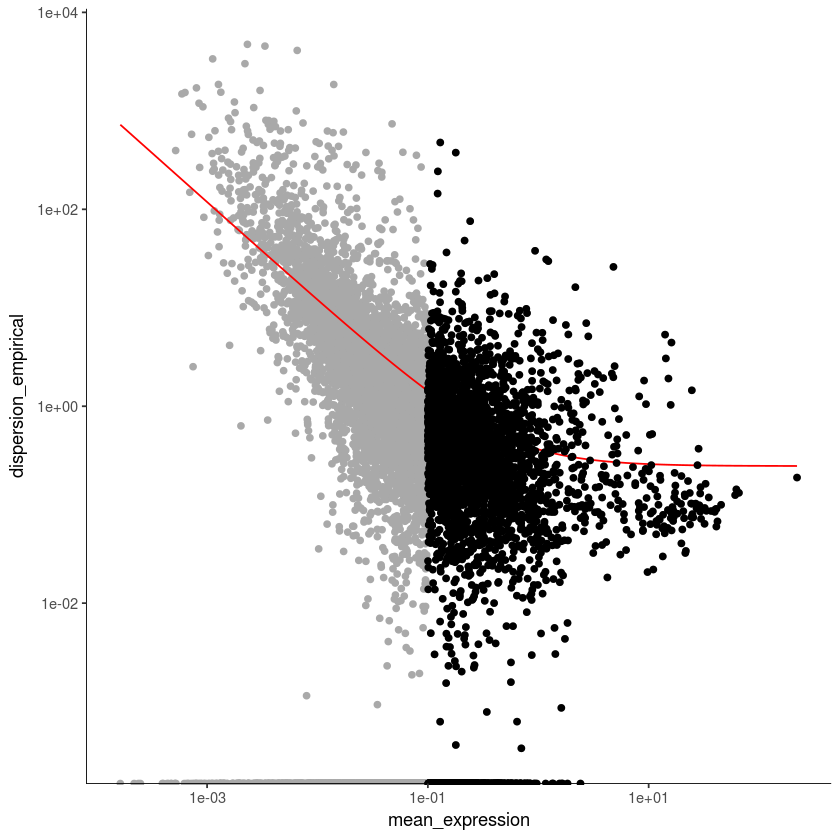

In [16]:
disp_table <- dispersionTable(GM_cds)
unsup_clustering_genes <- subset(disp_table, mean_expression >= 0.1)
GM_cds <- setOrderingFilter(GM_cds, unsup_clustering_genes$gene_id)
plot_ordering_genes(GM_cds)

Warning message in (function (A, nv = 5, nu = nv, maxit = 100, work = nv + 7, reorth = TRUE, :
“did not converge--results might be invlaid!; try increasing maxit or fastpath=FALSE”

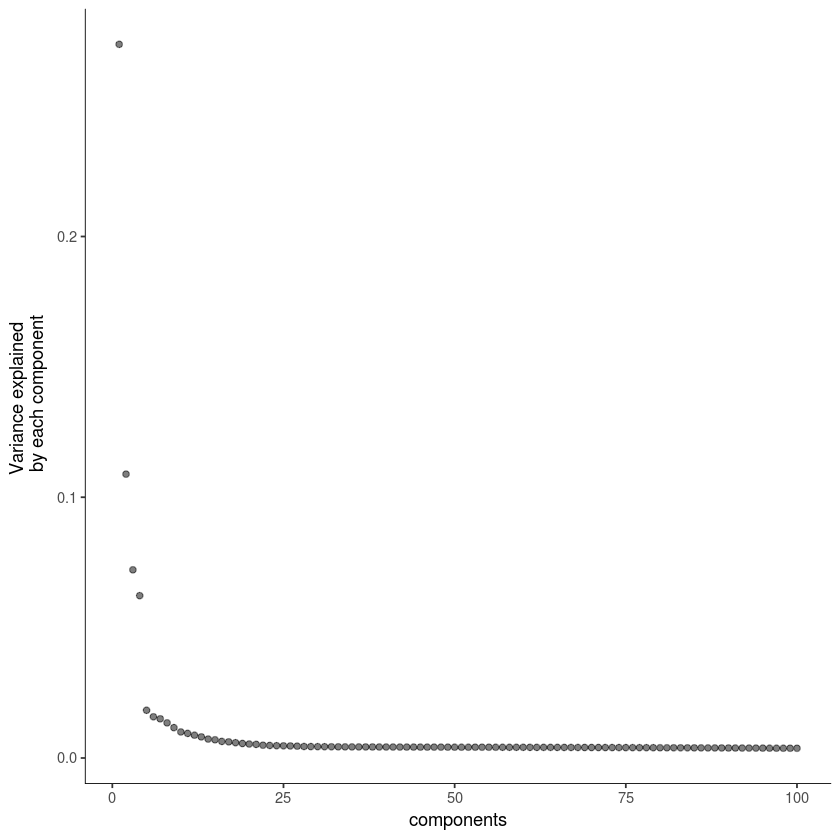

In [18]:
plot_pc_variance_explained(GM_cds, return_all = F) # norm_method = 'log',

In [19]:
GM_cds <- reduceDimension(GM_cds, max_components = 2, num_dim = 6,
                        reduction_method = 'tSNE', verbose = T)


Remove noise by PCA ...
Reduce dimension by tSNE ...
Warning message in if (method == "DDRTree") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (method == "densityPeak") {:
“the condition has length > 1 and only the first element will be used”

Distance cutoff calculated to 4.590591 


In [25]:
GM_cds <- clusterCells(GM_cds, method="densityPeak")

Distance cutoff calculated to 4.590591 


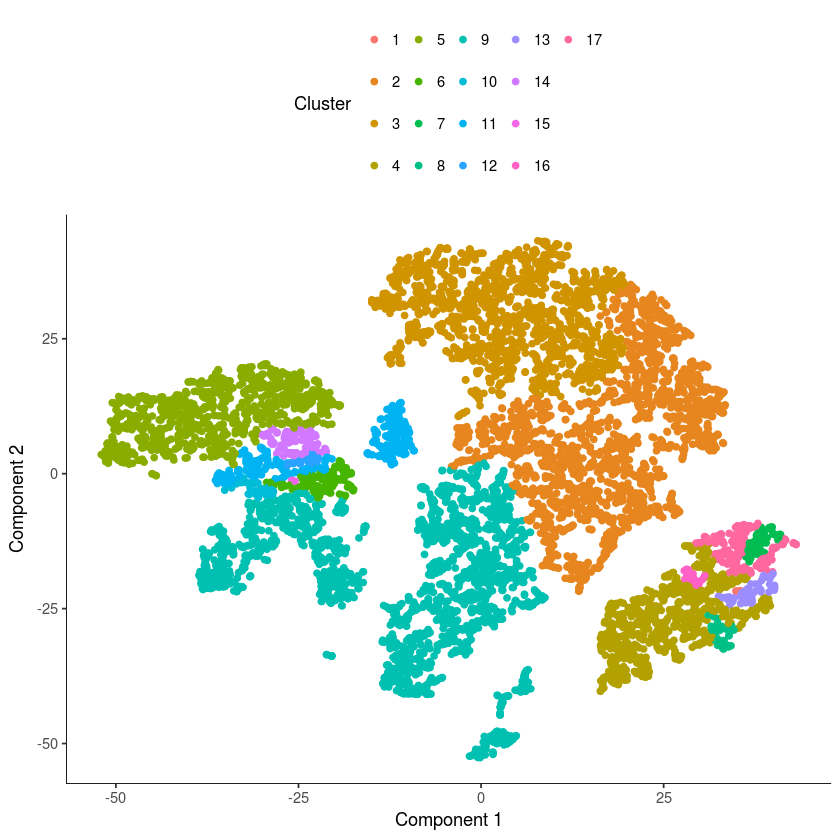

In [26]:
plot_cell_clusters(GM_cds, 1, 2, color = "Cluster")

In [ ]:
GM_cds <- setOrderingFilter(GM_cds, detected_sites)
GM_cds <- reduceDimension(GM_cds, max_components=2, num_dim = 3, norm_method="log", reduction_method = 'tSNE', verbose=TRUE)
